<a href="https://colab.research.google.com/github/rinrrino/Lab-1/blob/main/exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
## Задание 1. Старт. Загрузка и осмотр данных

### Скачиваем необходимый датасет

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Student_ID = 39

datasets = [
    ('US Air Carrier market in 2019','https://raw.githubusercontent.com/markpolyak/datasets/refs/heads/main/data/aircarrier_market_us_2019.zip'),
    ('Video Game Sales with Ratings', 'https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings'),
    ('Medical Cost Personal Dataset', 'https://www.kaggle.com/datasets/mirichoi0218/insurance'),
    ('Netflix Movies and TV Shows', 'https://www.kaggle.com/datasets/shivamb/netflix-shows')
]

dataset_id = None if Student_ID is None else Student_ID % len(datasets)
if dataset_id is None:
    print("ОШИБКА! Не указан порядковый номер студента в списке группы.")
else:
    print(f"Датасет '{datasets[dataset_id][0]}' доступен по следующей ссылке: {datasets[dataset_id][1]}")

Датасет 'Netflix Movies and TV Shows' доступен по следующей ссылке: https://www.kaggle.com/datasets/shivamb/netflix-shows


### Загружаем данные

In [25]:
import pandas as pd
import zipfile

with zipfile.ZipFile('archive.zip', 'r') as z:
    with z.open(z.namelist()[0]) as f:
        df = pd.read_csv(f)

df.head()

df.columns = df.columns.str.lower()
columns = df.columns.tolist()

print(columns)
df.info()

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Анализ датафрейма

In [10]:
print("Пропущенные значения:")
print(df.isnull().sum())

df_dropna = df.dropna()

print("\nСтатистики датасета:")
print(df_dropna.describe())

Пропущенные значения:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Статистики датасета:
       release_year
count   5332.000000
mean    2012.742123
std        9.625831
min     1942.000000
25%     2011.000000
50%     2016.000000
75%     2018.000000
max     2021.000000


## Задание 2. Работа с числовыми признаками


### Отбор числовых признаков

In [11]:
numeric_features = df_dropna.select_dtypes(include=['int', 'float']).columns.tolist()

df_numeric = df_dropna[numeric_features]

print("Числовые признаки:", numeric_features)
print(f"Размер числового датафрейма: {df_numeric.shape}")

Числовые признаки: ['release_year']
Размер числового датафрейма: (5332, 1)


### Визуализация распределений

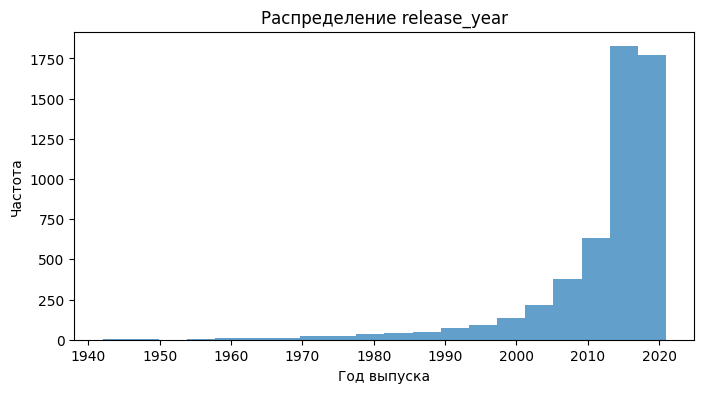

In [12]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.hist(df_numeric['release_year'], bins=20, alpha=0.7)
axes.set_title('Распределение release_year')
axes.set_xlabel('Год выпуска')
axes.set_ylabel('Частота')
plt.show()

### Поиск корреляции между числовыми признаками

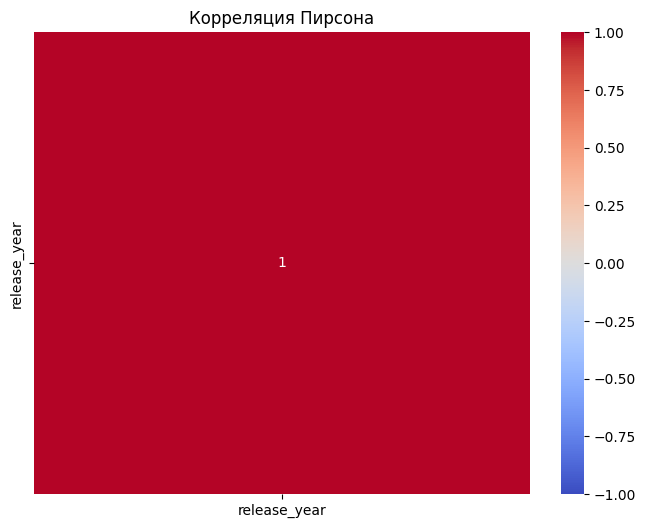

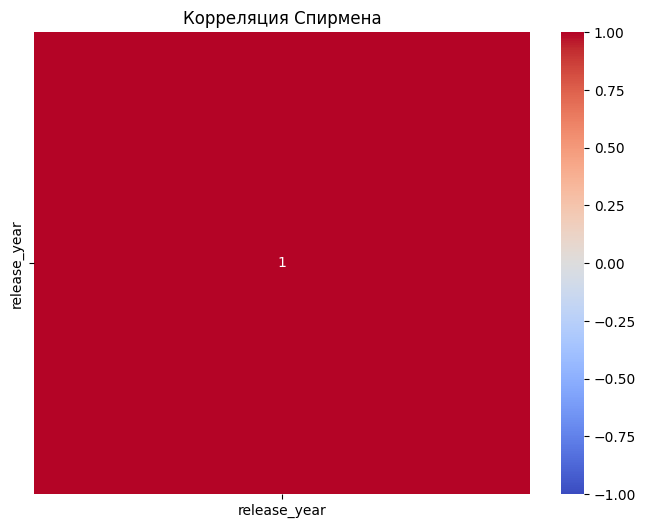

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_pearson = df_numeric.corr(method='pearson')
corr_spearman = df_numeric.corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляция Пирсона')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляция Спирмена')
plt.show()

В моем файле всего один числовой признак, поэтому поиск корреляции не имеет смысла

### Вычисление статистик

In [14]:
means = {}
medians = {}
stds = {}

for feature in numeric_features:
    means[feature] = df_numeric[feature].mean()
    medians[feature] = df_numeric[feature].median()
    stds[feature] = df_numeric[feature].std()

print("Средние значения:", means)
print("Медианы:", medians)
print("Стандартные отклонения:", stds)

Средние значения: {'release_year': np.float64(2012.7421230307577)}
Медианы: {'release_year': 2016.0}
Стандартные отклонения: {'release_year': 9.62583065835401}


### Стандартизация признаков

In [15]:
df_standart = df_numeric.copy()

for feature in numeric_features:
    df_standart[feature] = (df_numeric[feature] - means[feature]) / stds[feature]

print("Стандартизированные данные:")
print(df_standart.head())

Стандартизированные данные:
    release_year
7      -2.050953
8       0.857887
9       0.857887
12      0.857887
24     -1.531517


### Визуализируем стандартизацию

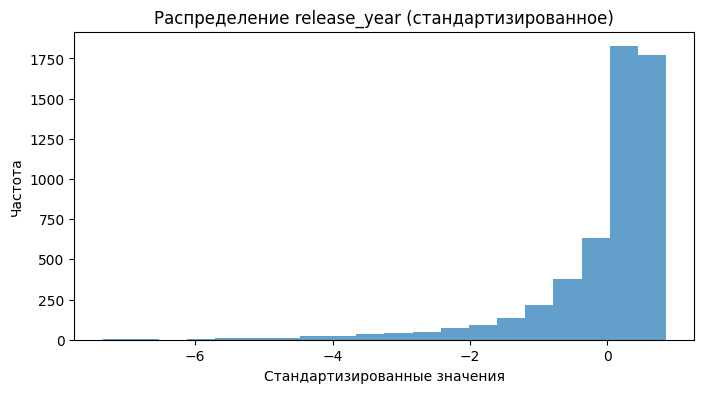

In [16]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
axes.hist(df_standart['release_year'], bins=20, alpha=0.7)
axes.set_title('Распределение release_year (стандартизированное)')
axes.set_xlabel('Стандартизированные значения')
axes.set_ylabel('Частота')
plt.show()

## Задание 3. Работа с категориальными признаками

### Отбор категориальных признаков

In [17]:
cat_features = df_dropna.select_dtypes(include=['object', 'category']).columns.tolist()

df_cat = df_dropna[cat_features]

print("Категориальные признаки:", cat_features)
print(f"Размер категориального датафрейма: {df_cat.shape}")

Категориальные признаки: ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']
Размер категориального датафрейма: (5332, 11)


### Визуализация распределений категориальных признаков

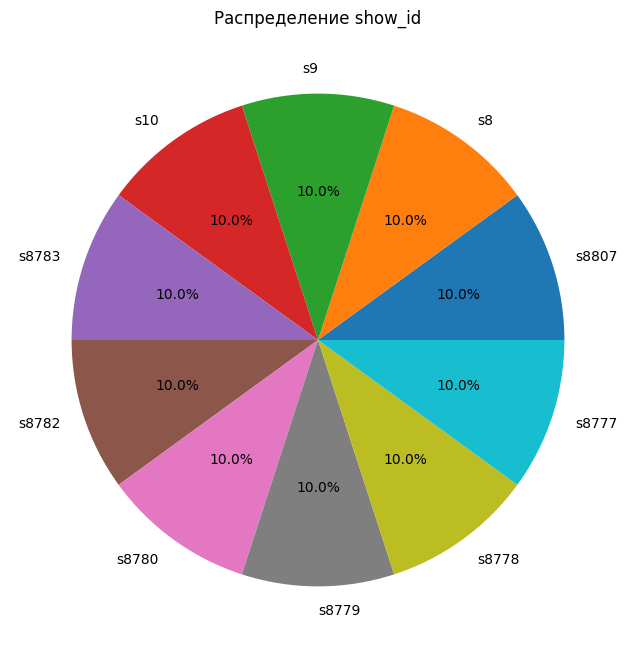

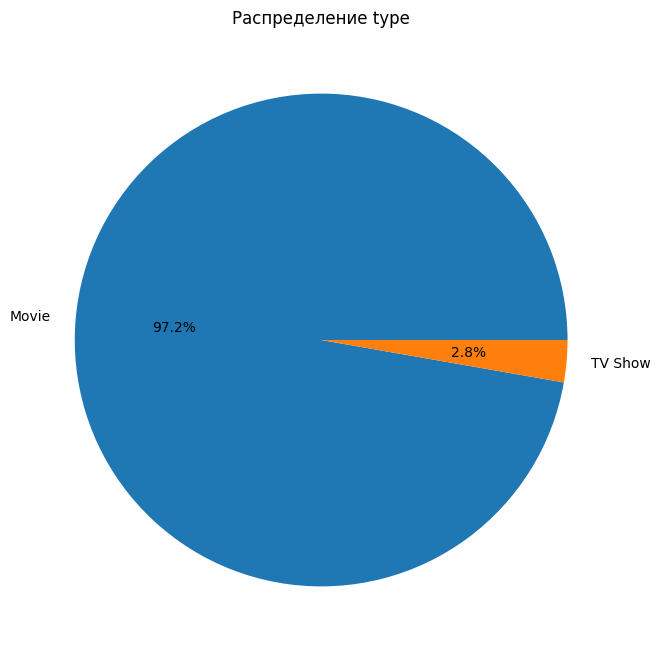

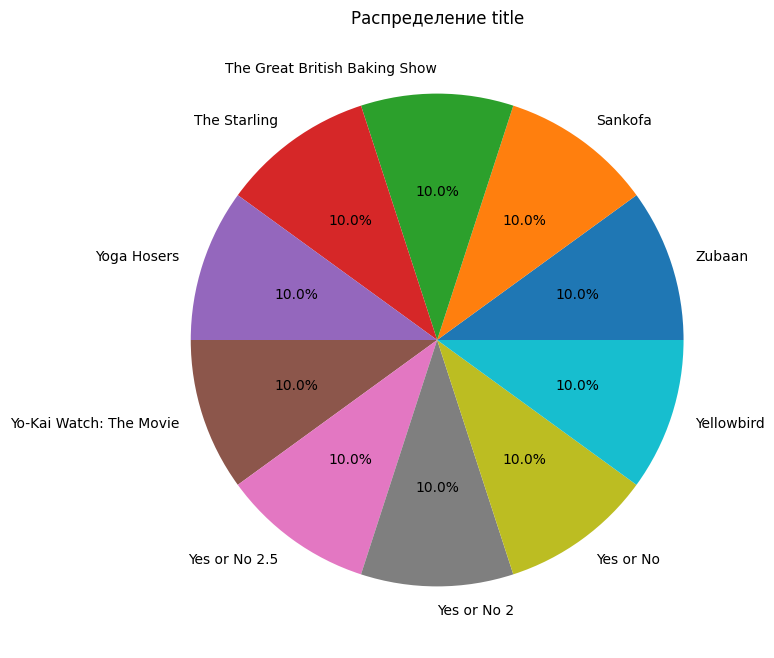

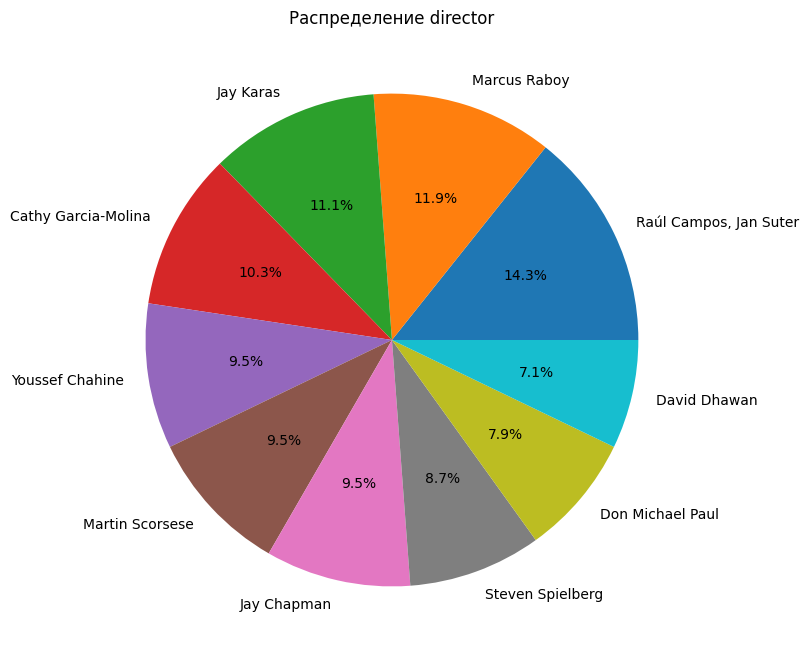

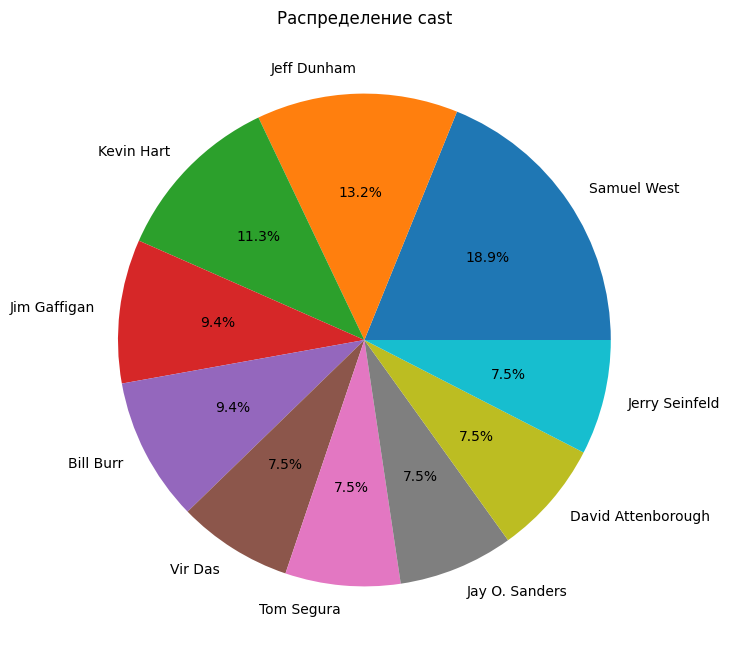

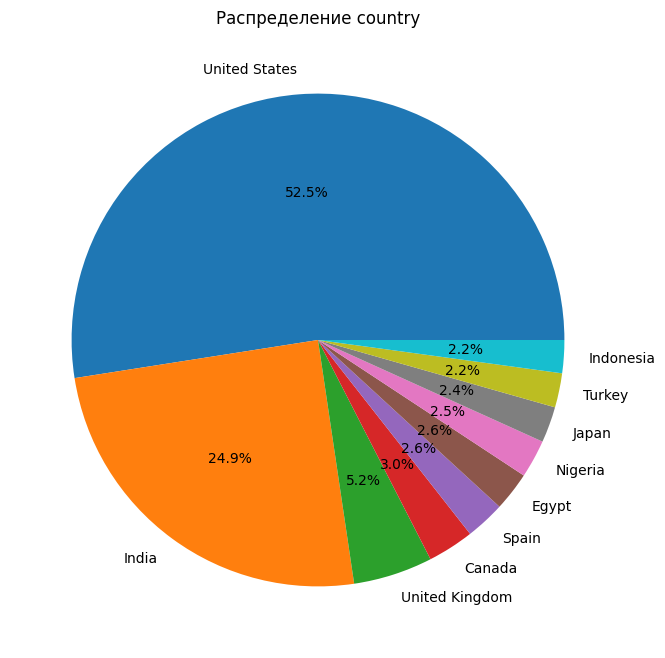

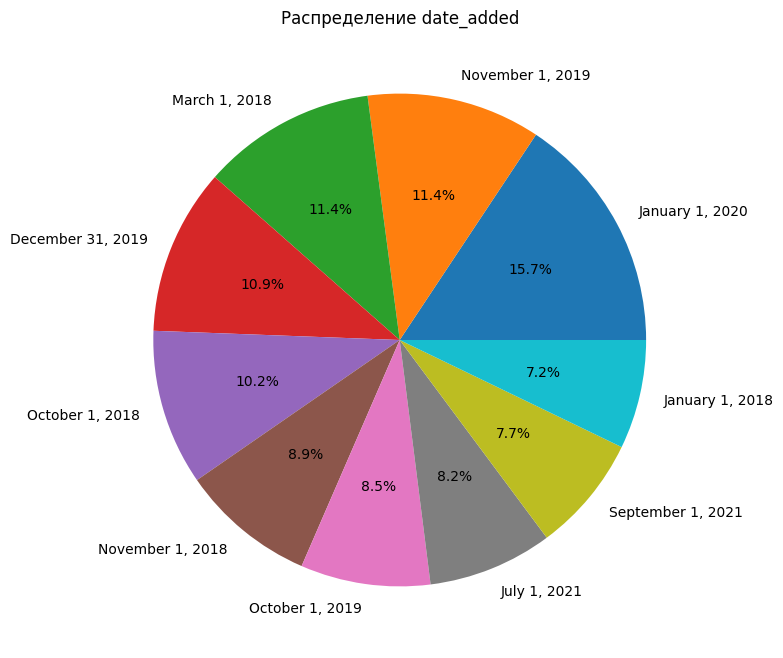

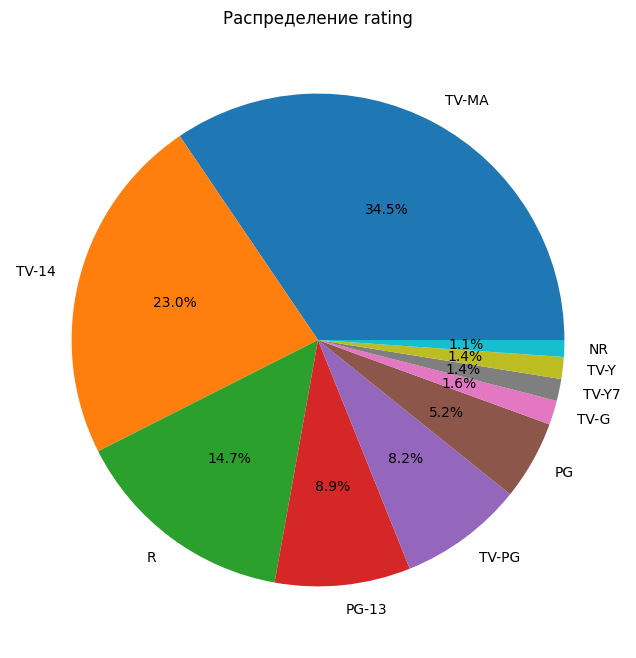

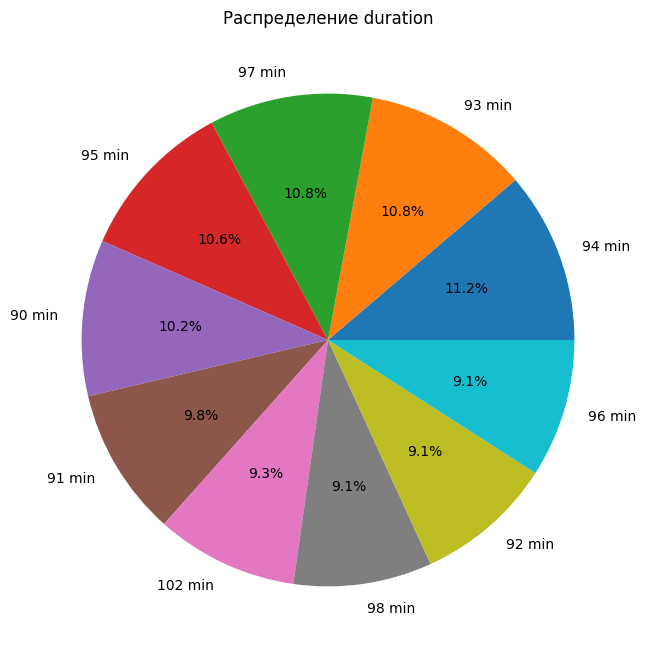

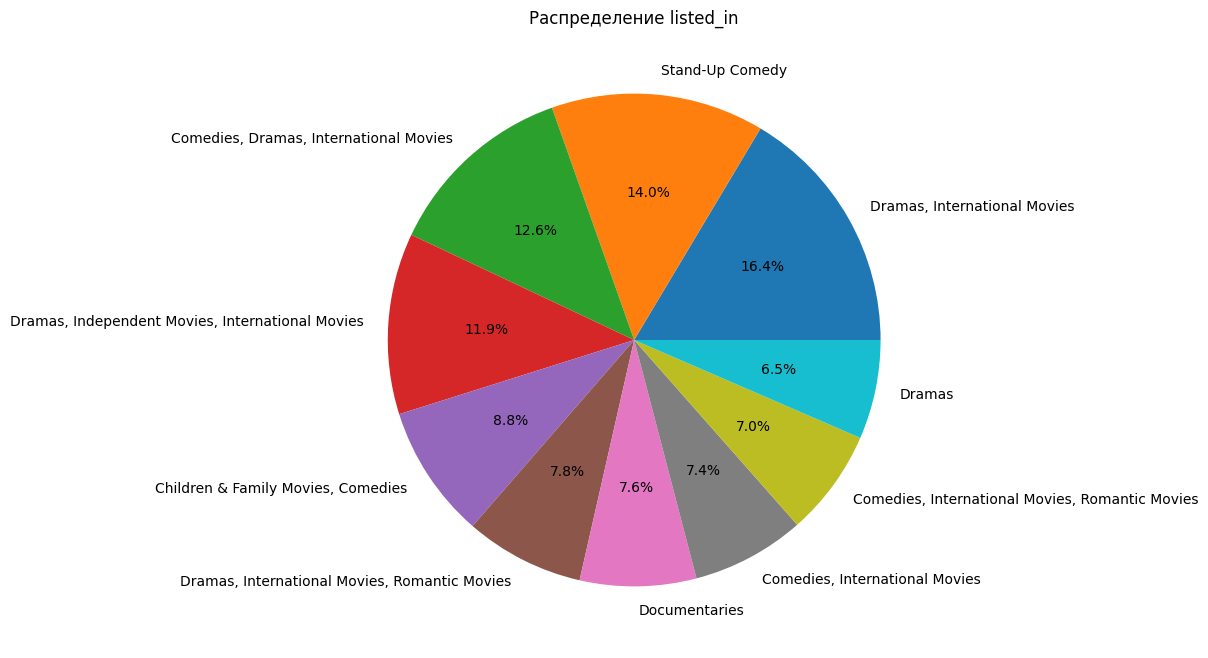

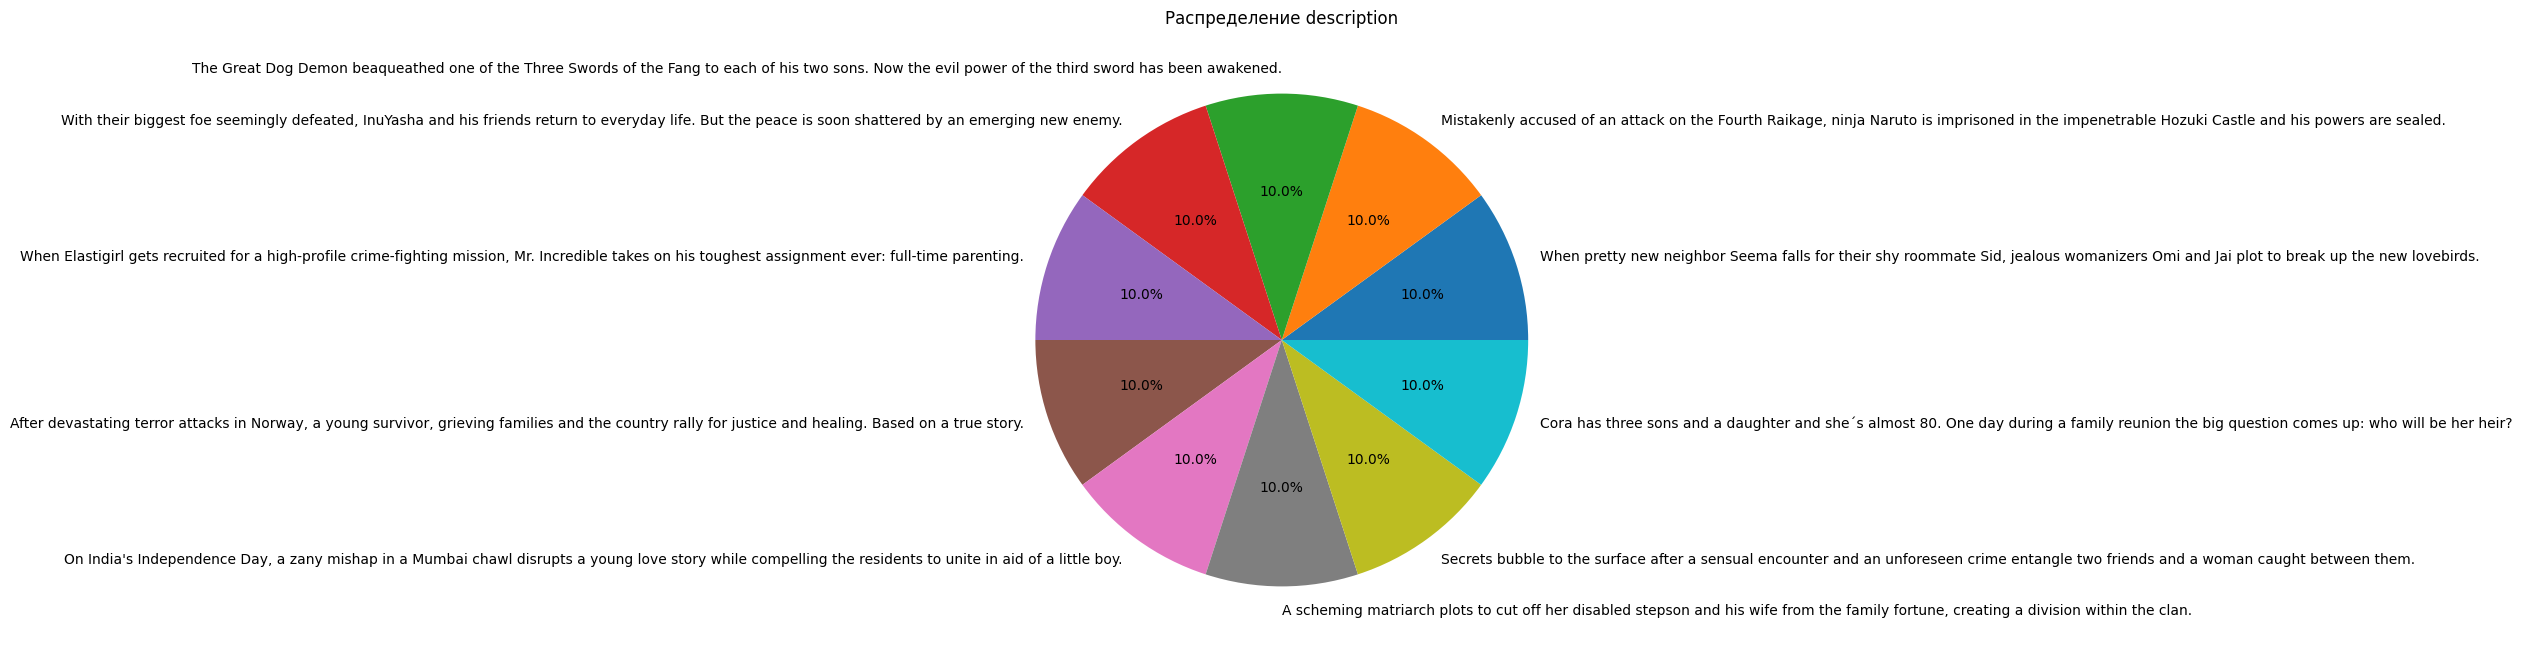

In [19]:
import matplotlib.pyplot as plt

for feature in cat_features:
    plt.figure(figsize=(10, 8))
    value_counts = df_cat[feature].value_counts().head(10)
    plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Распределение {feature}')
    plt.show()

### One-hot-encoding

In [20]:
df_ohe = pd.get_dummies(df_cat)

print("Размер после one-hot-encoding:", df_ohe.shape)
print("Столбцы после кодирования:", df_ohe.columns.tolist()[:10])  # покажем первые 10

Размер после one-hot-encoding: (5332, 27736)
Столбцы после кодирования: ['show_id_s10', 'show_id_s1000', 'show_id_s1002', 'show_id_s1003', 'show_id_s1014', 'show_id_s1016', 'show_id_s1017', 'show_id_s1018', 'show_id_s1019', 'show_id_s1020']


## Задание 4. Поиск выбросов

In [21]:
mask = (df_standart ** 2).sum(axis=1) ** 0.5 <= 3  # L2 норма <= 3
df_standart_f = df_standart[mask]

df_ohe_f = df_ohe.loc[mask]

df_filtered = pd.concat([df_standart_f, df_ohe_f], axis=1)

print(f"Было объектов: {len(df_standart)}")
print(f"Осталось объектов после фильтрации: {len(df_standart_f)}")
print(f"Удалено выбросов: {len(df_standart) - len(df_standart_f)}")

Было объектов: 5332
Осталось объектов после фильтрации: 5186
Удалено выбросов: 146
